# Comparative Analysis of Machine Learning Models for Predicting Smart Grid Stability

In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("/kaggle/input/smart-grid-stability/smart_grid_stability_augmented.csv")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


The dataset contains several variables that are likely related to the characteristics of a smart grid system. 

* **tau1, tau2, tau3, tau4:** These columns could represent time constants related to different components or areas within the grid.
* **p1, p2, p3, p4:** These might be power measurements or demands at four different points or sectors in the grid.
* **g1, g2, g3, g4:** These could be generation capacities or some form of efficiency parameters for generators at four locations.
* **stab:** A numerical stability indicator, possibly a calculated stability metric.
* **stabf:** A categorical stability indicator with values 'stable' or 'unstable'.

# Summary Statistics and Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [5]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403


**Summary Statistics:**

* The variables **tau1, tau2, tau3, tau4, g1, g2, g3**, and **g4** have a mean value around **5.25** and **0.525**, respectively, with their distributions spanning a similar range which suggests a uniform distribution across these parameters.
* The power variables **p1, p2, p3**, and **p4** show that **p1** has a positive mean **(3.75)** indicating it might be a supply point, whereas **p2, p3**, and **p4** have negative means **(-1.25)** suggesting they are demand points. Their standard deviations are relatively small, indicating that the values do not vary widely from the mean.
* The **stab** variable, which appears to be a numerical stability indicator, has a mean close to **0.0157**, with a minimum and maximum value indicating a range of stability conditions in the grid.

# Analysis of Distributions and Correlations

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

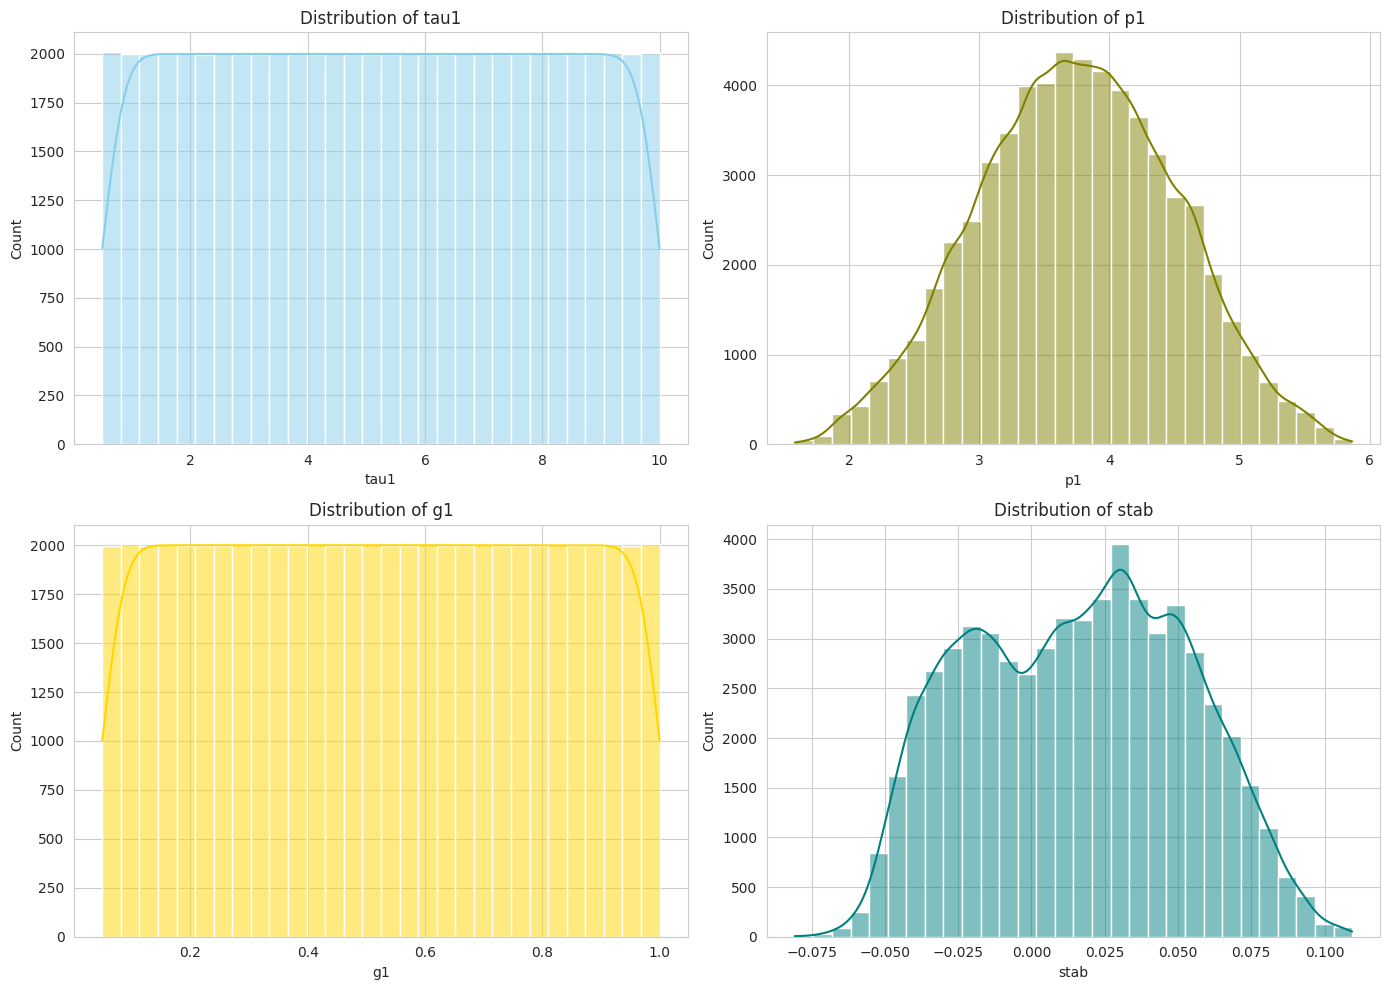

In [7]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['tau1'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
sns.histplot(df['p1'], bins=30, kde=True, ax=axes[0, 1], color='olive')
sns.histplot(df['g1'], bins=30, kde=True, ax=axes[1, 0], color='gold')
sns.histplot(df['stab'], bins=30, kde=True, ax=axes[1, 1], color='teal')

axes[0, 0].set_title('Distribution of tau1')
axes[0, 1].set_title('Distribution of p1')
axes[1, 0].set_title('Distribution of g1')
axes[1, 1].set_title('Distribution of stab')

plt.tight_layout()
plt.show()

**Distributions:**

* **tau1, g1, and stab:** The distributions of **tau1, g1**, and **stab** suggest a relatively uniform distribution for **tau1** and **g1**, indicating that these parameters are spread evenly across their range. The stability metric stab shows a distribution that is slightly skewed, but it also appears to cover a broad range of values.
* **p1:** The distribution of **p1** shows variability in power generation/demand, with a peak indicating a common value range but with the distribution covering both supply and demand ranges.

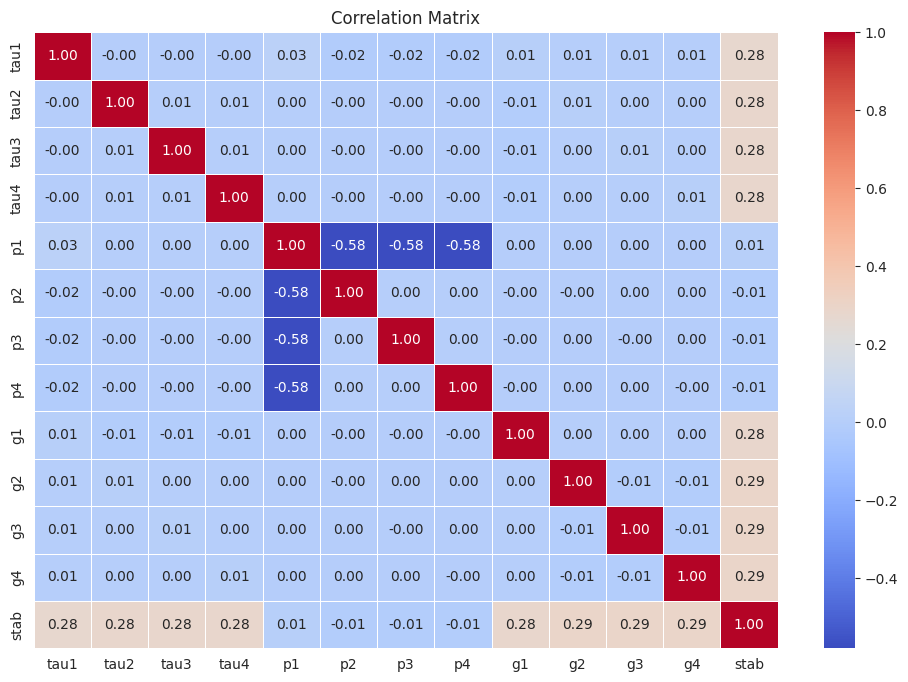

Correlation with 'stab':
 stab    1.000000
g3      0.293684
g2      0.293684
g4      0.293684
tau4    0.283417
tau2    0.283417
tau3    0.283417
g1      0.282774
tau1    0.275761
p1      0.010278
p2     -0.005951
p3     -0.005951
p4     -0.005951
Name: stab, dtype: float64


In [8]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

correlation_with_stab = correlation_matrix['stab'].sort_values(ascending=False)
print("Correlation with 'stab':\n", correlation_with_stab)


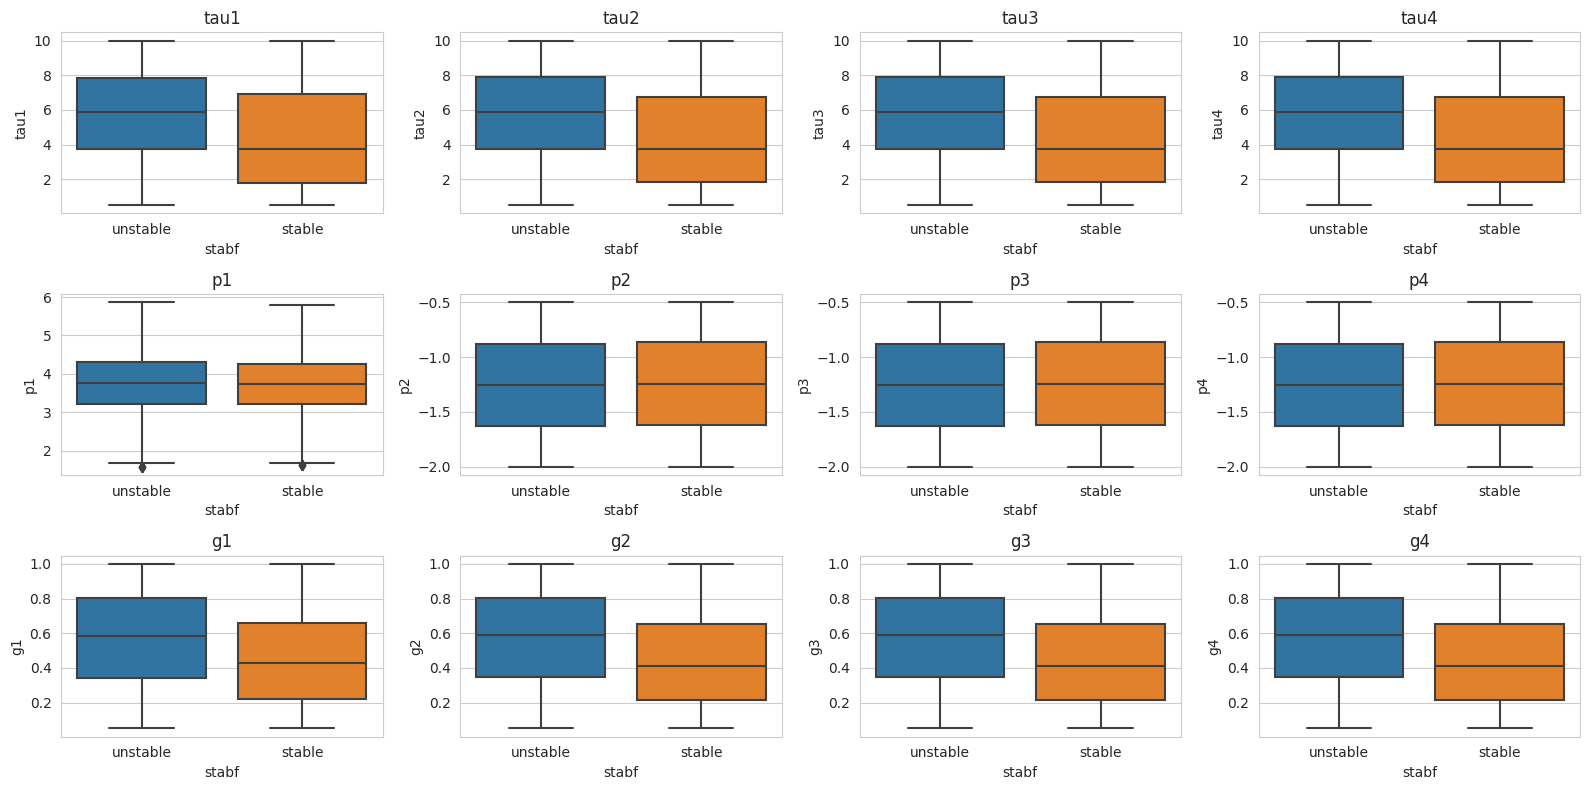

In [9]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(df.columns[:-2]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='stabf', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()


In [10]:
class_distribution = df['stabf'].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
stabf
unstable    38280
stable      21720
Name: count, dtype: int64


# Random Forest Classifier

In [11]:
# Encode the categorical target variable
le = LabelEncoder()
df['stabf_encoded'] = le.fit_transform(df['stabf'])

X = df.drop(['stabf', 'stabf_encoded', 'stab'], axis=1) 
y = df['stabf_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9479

Classification Report:
               precision    recall  f1-score   support

      stable       0.94      0.91      0.93      4322
    unstable       0.95      0.97      0.96      7678

    accuracy                           0.95     12000
   macro avg       0.95      0.94      0.94     12000
weighted avg       0.95      0.95      0.95     12000



The **Random Forest classifier** achieved an accuracy of approximately **94.79%** on the testing set. This is a strong performance, indicating that the model is quite effective at predicting grid stability based on the given features. Here's a detailed breakdown:

**Precision:**
Stable: 94%
Unstable: 95%

**Recall:**
Stable: 91%
Unstable: 97%

**F1-Score:**
Stable: 93%
Unstable: 96%

The model shows slightly better performance in identifying 'unstable' conditions compared to 'stable' ones, which is reflected in the higher recall and F1-score for the 'unstable' class. This could be particularly useful in a practical scenario where identifying unstable conditions might be more critical.

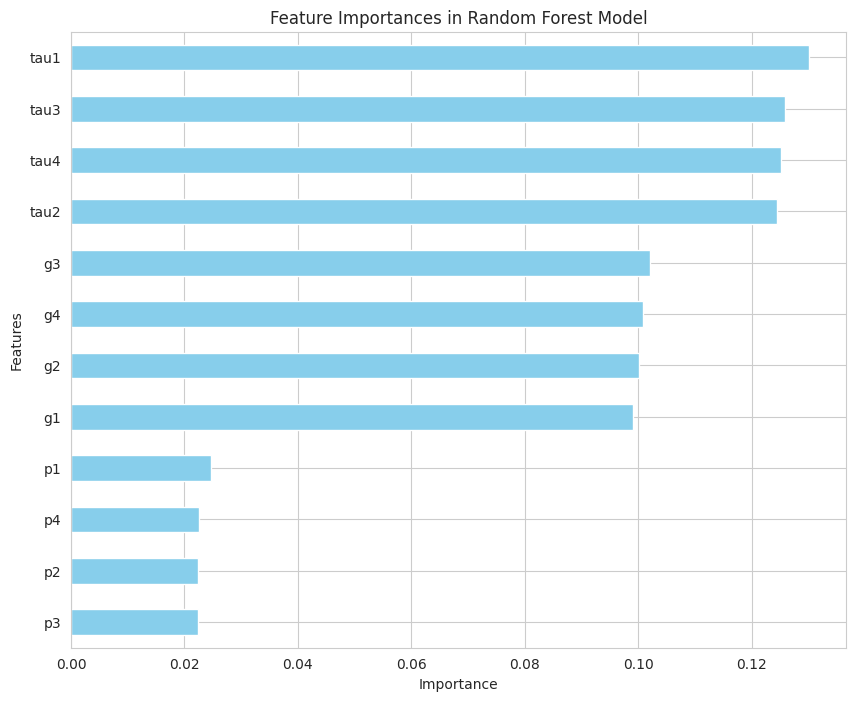

tau1    0.130133
tau3    0.125962
tau4    0.125217
tau2    0.124471
g3      0.102101
g4      0.100898
g2      0.100107
g1      0.099025
p1      0.024762
p4      0.022644
p2      0.022378
p3      0.022304
dtype: float64

In [12]:
feature_importances = rf_classifier.feature_importances_

importances_series = pd.Series(feature_importances, index=X_train.columns)

plt.figure(figsize=(10, 8))
importances_series.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

importances_series.sort_values(ascending=False)


**Feature Importance Analysis Results**

The analysis of feature importances in the Random Forest model reveals the following insights:

* **Time Constants (tau1, tau2, tau3, tau4):** These are the most important features for predicting grid stability, with tau1 being the most significant, followed by tau3, tau4, and tau2. This suggests that the time-related characteristics of the grid components play a crucial role in determining its stability.
* **Generation Capacities (g1, g2, g3, g4):** The generation capacities or efficiency parameters also contribute significantly to the prediction of grid stability, though they are less important than the time constants. Among these, g3 and g4 are slightly more influential than g1 and g2.
* **Power Demands (p1, p2, p3, p4):** These features have the least influence on the model's predictions. However, they still contribute to the overall decision-making process of the model, with p1 being slightly more important than the others.

# Decision Tree Classifier

In [13]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt, target_names=le.classes_)

print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:\n", classification_rep_dt)

Accuracy: 0.8958

Classification Report:
               precision    recall  f1-score   support

      stable       0.85      0.86      0.86      4322
    unstable       0.92      0.92      0.92      7678

    accuracy                           0.90     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.90      0.90      0.90     12000



# Support Vector Machine Classifier

In [14]:
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, target_names=le.classes_)
 
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

Accuracy: 0.8111

Classification Report:
               precision    recall  f1-score   support

      stable       0.76      0.69      0.73      4322
    unstable       0.84      0.88      0.86      7678

    accuracy                           0.81     12000
   macro avg       0.80      0.79      0.79     12000
weighted avg       0.81      0.81      0.81     12000



# XGBoost Classifier

In [15]:
from xgboost import XGBClassifier


xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, target_names=le.classes_)

print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_rep_xgb)


Accuracy: 0.9793

Classification Report:
               precision    recall  f1-score   support

      stable       0.97      0.97      0.97      4322
    unstable       0.98      0.99      0.98      7678

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



**XGBoost:**

Demonstrates exceptional performance with the highest accuracy among the models evaluated.
Offers superior precision, recall, and F1-scores, highlighting its effectiveness in accurately classifying both 'stable' and 'unstable' states of the smart grid.
Its performance underscores XGBoost's capability to handle complex datasets and capture intricate patterns within the data, making it an excellent choice for critical predictive tasks where accuracy is paramount.

# Report

In [16]:
print("Random Forest Classifier Report:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)

print("\nDecision Tree Classifier Report:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:\n", classification_rep_dt)

print("\nSupport Vector Machine Classifier Report:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

print("\nXGBoost Classifier Report:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_rep_xgb)

Random Forest Classifier Report:
Accuracy: 0.9479

Classification Report:
               precision    recall  f1-score   support

      stable       0.94      0.91      0.93      4322
    unstable       0.95      0.97      0.96      7678

    accuracy                           0.95     12000
   macro avg       0.95      0.94      0.94     12000
weighted avg       0.95      0.95      0.95     12000


Decision Tree Classifier Report:
Accuracy: 0.8958

Classification Report:
               precision    recall  f1-score   support

      stable       0.85      0.86      0.86      4322
    unstable       0.92      0.92      0.92      7678

    accuracy                           0.90     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.90      0.90      0.90     12000


Support Vector Machine Classifier Report:
Accuracy: 0.8111

Classification Report:
               precision    recall  f1-score   support

      stable       0.76      0.69      0.73      4322
 

# Comprehensive Comparative Analysis

* **XGBoost** and **Random** Forest stand out for their high accuracy and strong performance across both 'stable' and 'unstable' classes, with XGBoost slightly leading in overall metrics.
* **Decision Tree** offers a balance between performance and interpretability, making it useful for scenarios where understanding the model's decision-making process is important.
* **SVM** shows competitive performance, especially in classifying the 'unstable' class, though it falls short of the ensemble methods in overall accuracy. Its performance reflects SVM's strength in handling complex decision boundaries, even though it may not achieve the highest accuracy in this specific context.